In [1]:
import numpy as np
import os
import sys

In [2]:
# Path para importacion de funciones
dir_actual    = os.path.abspath('')
dir_parent = os.path.dirname(dir_actual)
if not dir_parent in sys.path: sys.path.append(dir_parent)

In [102]:
from functions import load_obj, save_obj

ciclos = load_obj('numero_de_ciclosv2')
print('Total de ciclos utilizados:',ciclos)
stats_IOBuffer_1 = load_obj('stats_B1v2')
stats_IOBuffer_2 = load_obj('stats_B2v2')

stats_IOBuffer_1['ciclos_0'] = ciclos - stats_IOBuffer_1['ciclos_1'] 
stats_IOBuffer_2['ciclos_0'] = ciclos - stats_IOBuffer_2['ciclos_1'] 

Total de ciclos utilizados: 8820000


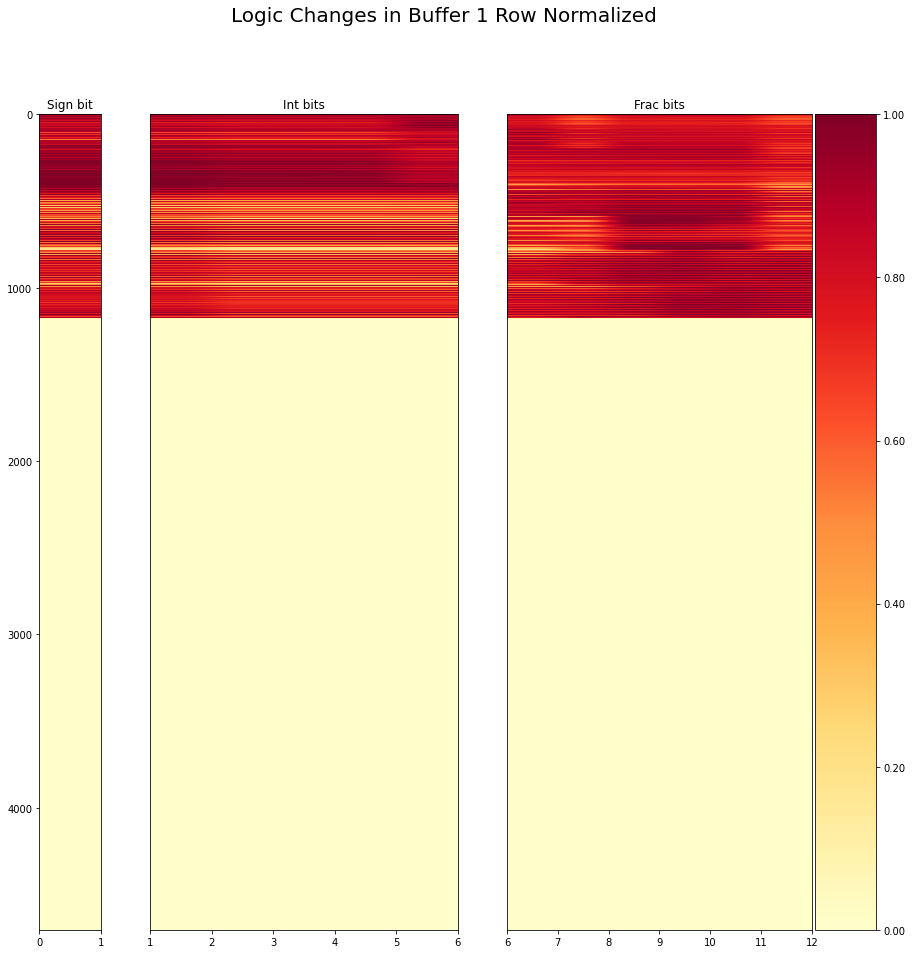

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

word_size  = 12
# Segment of the buffer to plot
buffer_low  = 0
buffer_high = 4704
rows = buffer_high-buffer_low

# Numero de cambios logicos porcentuales con respecto al numero de ciclos
data = stats_IOBuffer_1['cambios_logicos'].copy().astype(float)
# Organize buffer to display -> 1 row per activation
data = np.reshape(data[buffer_low*word_size:buffer_high*word_size],(rows,word_size))
# Row-wise normalization 
Row_Normalization = True
if Row_Normalization:
    index = 0
    while index < rows:
        if np.max(data[index]) != 0:
            data[index] = data[index]/np.max(data[index])
        index += 1

mx = np.max(data)
mn = np.min(data)
        
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1, 5, 6]})
fig.suptitle('Logic Changes in Buffer 1 Row Normalized', fontsize=20)

ax1.set_title('Sign bit')
im1 = ax1.imshow(data[...,0:1], aspect='auto',cmap='YlOrRd',extent=[0,1,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax1.set_xticks([0,1])

ax2.set_title('Int bits')
im2 = ax2.imshow(data[...,1:6], aspect='auto',cmap='YlOrRd',extent=[1,6,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax2.yaxis.set_visible(False)

ax3.set_title('Frac bits')
im3 = ax3.imshow(data[...,6:12], aspect='auto',cmap='YlOrRd',extent=[6,12,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3, format="%.2f")
ax3.yaxis.set_visible(False)

#fig.savefig('Figuras/Buffers_Colormaps/Buffer 1 Logic Changes all slots Row Normalized')

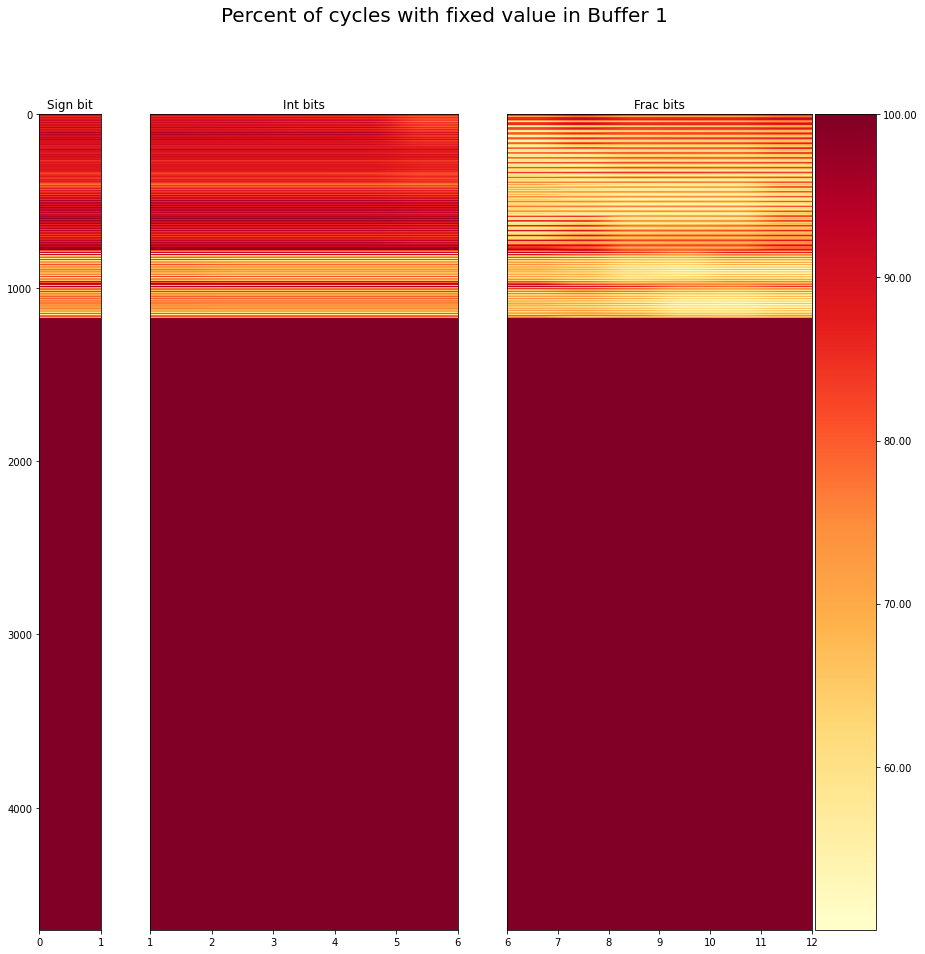

In [111]:
word_size  = 12
# Segment of the buffer to plot
buffer_low  = 0
buffer_high = 4704
rows = buffer_high-buffer_low

# Numero de cambios logicos porcentuales con respecto al numero de ciclos
data = np.maximum(stats_IOBuffer_1['ciclos_1'],stats_IOBuffer_1['ciclos_0']).astype(float)
data = data/ciclos*100
# Organize buffer to display -> 1 row per activation
data = np.reshape(data[buffer_low*word_size:buffer_high*word_size],(rows,word_size))
# Row-wise normalization 
Row_Normalization = False
if Row_Normalization:
    index = 0
    while index < rows:
        if np.max(data[index]) != 0:
            data[index] = data[index]/np.max(data[index])
        index += 1

mx = np.max(data)
mn = np.min(data)
        
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1, 5, 6]})
fig.suptitle('Percent of cycles with fixed value in Buffer 1', fontsize=20)

ax1.set_title('Sign bit')
im1 = ax1.imshow(data[...,0:1], aspect='auto',cmap='YlOrRd',extent=[0,1,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax1.set_xticks([0,1])

ax2.set_title('Int bits')
im2 = ax2.imshow(data[...,1:6], aspect='auto',cmap='YlOrRd',extent=[1,6,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax2.yaxis.set_visible(False)

ax3.set_title('Frac bits')
im3 = ax3.imshow(data[...,6:12], aspect='auto',cmap='YlOrRd',extent=[6,12,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3, format="%.2f")
ax3.yaxis.set_visible(False)

fig.savefig('Figuras/Buffers_Colormaps/Percent of cycles with fixed value in Buffer 1')

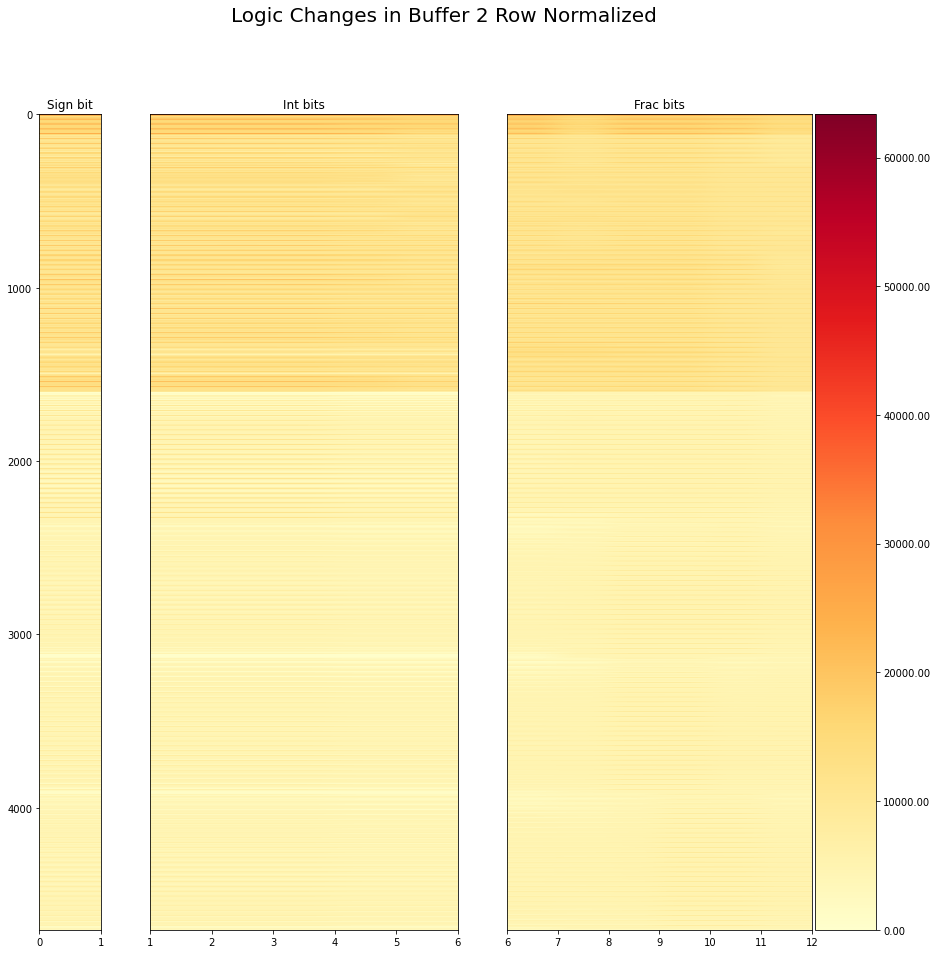

In [117]:
word_size  = 12
# Segment of the buffer to plot
buffer_low  = 0
buffer_high = 4704
rows = buffer_high-buffer_low

# Numero de cambios logicos porcentuales con respecto al numero de ciclos
data = stats_IOBuffer_2['cambios_logicos'].copy().astype(float)
# Organize buffer to display -> 1 row per activation
data = np.reshape(data[buffer_low*word_size:buffer_high*word_size],(rows,word_size))
# Row-wise normalization 
Row_Normalization = False
if Row_Normalization:
    index = 0
    while index < rows:
        if np.max(data[index]) != 0:
            data[index] = data[index]/np.max(data[index])
        index += 1

mx = np.max(data)
mn = np.min(data)
        
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1, 5, 6]})
fig.suptitle('Logic Changes in Buffer 2 Row Normalized', fontsize=20)

ax1.set_title('Sign bit')
im1 = ax1.imshow(data[...,0:1], aspect='auto',cmap='YlOrRd',extent=[0,1,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax1.set_xticks([0,1])

ax2.set_title('Int bits')
im2 = ax2.imshow(data[...,1:6], aspect='auto',cmap='YlOrRd',extent=[1,6,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax2.yaxis.set_visible(False)

ax3.set_title('Frac bits')
im3 = ax3.imshow(data[...,6:12], aspect='auto',cmap='YlOrRd',extent=[6,12,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3, format="%.2f")
ax3.yaxis.set_visible(False)

fig.savefig('Figuras/Buffers_Colormaps/Buffer 2 Logic Changes all slots')

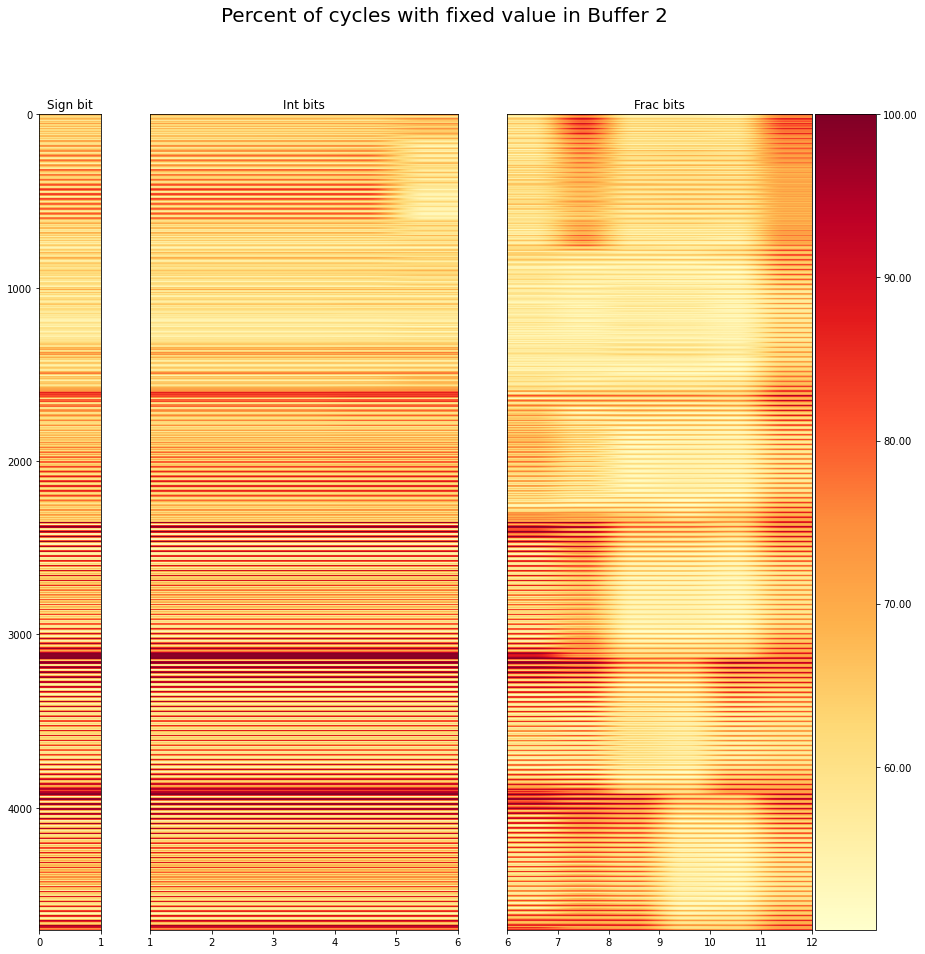

In [119]:
word_size  = 12
# Segment of the buffer to plot
buffer_low  = 0
buffer_high = 4704
rows = buffer_high-buffer_low

# Numero de cambios logicos porcentuales con respecto al numero de ciclos
data = np.maximum(stats_IOBuffer_2['ciclos_1'],stats_IOBuffer_2['ciclos_0']).astype(float)
data = data/ciclos*100
# Organize buffer to display -> 1 row per activation
data = np.reshape(data[buffer_low*word_size:buffer_high*word_size],(rows,word_size))
# Row-wise normalization 
Row_Normalization = False
if Row_Normalization:
    index = 0
    while index < rows:
        if np.max(data[index]) != 0:
            data[index] = data[index]/np.max(data[index])
        index += 1

mx = np.max(data)
mn = np.min(data)
        
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1, 5, 6]})
fig.suptitle('Percent of cycles with fixed value in Buffer 2', fontsize=20)

ax1.set_title('Sign bit')
im1 = ax1.imshow(data[...,0:1], aspect='auto',cmap='YlOrRd',extent=[0,1,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax1.set_xticks([0,1])

ax2.set_title('Int bits')
im2 = ax2.imshow(data[...,1:6], aspect='auto',cmap='YlOrRd',extent=[1,6,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax2.yaxis.set_visible(False)

ax3.set_title('Frac bits')
im3 = ax3.imshow(data[...,6:12], aspect='auto',cmap='YlOrRd',extent=[6,12,buffer_high,buffer_low],vmin=mn, vmax=mx)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3, format="%.2f")
ax3.yaxis.set_visible(False)

fig.savefig('Figuras/Buffers_Colormaps/Percent of cycles with fixed value in Buffer 2')